In [1]:
from keras.datasets.mnist import load_data
import matplotlib.pyplot as plt

In [2]:
(train_x, train_y), (test_x, test_y) = load_data()
print(f"Train X: {train_x.shape}| Train Y: {train_y.shape}")
print(f"------------------------------------------------------")
print(f"Test X: {test_x.shape}| Test Y: {test_y.shape}")

Train X: (60000, 28, 28)| Train Y: (60000,)
------------------------------------------------------
Test X: (10000, 28, 28)| Test Y: (10000,)


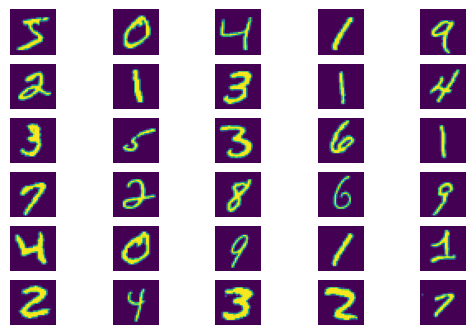

In [3]:
for i in range(30):
    plt.subplot(7, 5, 1 + i)
    plt.axis("off")
    plt.imshow(train_x[i])
plt.show()

In [4]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Conv2D , Flatten, Dropout, LeakyReLU, Reshape, Conv2DTranspose
from keras.utils import plot_model

In [5]:
def build_discriminator(in_shape=(28, 28, 1)):
    model = Sequential()
    values = [ 128, 128, 256]
    model.add(Conv2D(64, (3,3), padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))

    for i in range(3):
        model.add(Conv2D(values[i], (3,3), strides=(2, 2), padding='same'))
        model.add(LeakyReLU(alpha=0.2))

    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))

    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

    return model

In [6]:
model = build_discriminator()
model.summary()


c:\Users\diaal\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\diaal\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 521,345 (1.99 MB)

 Trainable params: 521,345 (1.99 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
def load_real_samples():

    (train_x, _), (_, _) = load_data()

    x = train_x.astype('float32')

    x = (x - 127.5)/127.5

    return x

In [8]:
import numpy as np
def generate_real_samples(dataset, n_samples):

    ix = np.random.randint(0, dataset.shape[0], n_samples)

    x = dataset[ix]

    y = np.ones((n_samples, 1))

    return x, y

In [9]:
def generate_fake_samples(n_samples):

    x = np.random.rand(28 * 28 * 1 * n_samples)

    x = -1 + x *2 

    x = x.reshape((n_samples, 28, 28, 1))

    y = np.zeros((n_samples, 1))

    return x, y

In [10]:
def train_discriminator(model, dataset ,n_iter=200, n_batch=128):

    half_batch = int(n_batch / 2)

    for i in range(n_iter):

        x_real, y_real = generate_real_samples(dataset, half_batch)
        
        _, real_acc = model.train_on_batch(x_real, y_real)

        x_fake, y_fake = generate_fake_samples(half_batch)

        _, fake_acc = model.train_on_batch(x_fake, y_fake)

        print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))

In [11]:
model = build_discriminator()

dataset = load_real_samples()


In [12]:
train_discriminator(model, dataset)


>1 real=91% fake=45%
>2 real=64% fake=48%
>3 real=59% fake=53%
>4 real=60% fake=62%
>5 real=66% fake=69%
>6 real=72% fake=74%
>7 real=76% fake=78%
>8 real=79% fake=81%
>9 real=82% fake=83%
>10 real=84% fake=85%
>11 real=85% fake=86%
>12 real=87% fake=87%
>13 real=88% fake=88%
>14 real=89% fake=89%
>15 real=89% fake=90%
>16 real=90% fake=90%
>17 real=91% fake=91%
>18 real=91% fake=91%
>19 real=92% fake=92%
>20 real=92% fake=92%
>21 real=92% fake=93%
>22 real=93% fake=93%
>23 real=93% fake=93%
>24 real=93% fake=94%
>25 real=94% fake=94%
>26 real=94% fake=94%
>27 real=94% fake=94%
>28 real=94% fake=94%
>29 real=95% fake=95%
>30 real=95% fake=95%
>31 real=95% fake=95%
>32 real=95% fake=95%
>33 real=95% fake=95%
>34 real=95% fake=95%
>35 real=96% fake=96%
>36 real=96% fake=96%
>37 real=96% fake=96%
>38 real=96% fake=96%
>39 real=96% fake=96%
>40 real=96% fake=96%
>41 real=96% fake=96%
>42 real=96% fake=96%
>43 real=96% fake=96%
>44 real=96% fake=96%
>45 real=97% fake=97%
>46 real=97% fake=9

In [27]:
def build_generator(latent_dim):
    model = Sequential()
    n_nodes = 128 *7 * 7

    model.add(Dense(n_nodes, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((7, 7, 128)))

    for _ in range(2):
        model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
        model.add(LeakyReLU(alpha=0.2))
    
    model.add(Conv2DTranspose(128, (4, 4), strides=(1, 1), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    model.add(Conv2D(1, (7, 7), activation='tanh', padding='same'))

    return model


In [28]:
latent_dim = 100


model = build_generator(latent_dim)

model.summary()

plot_model(model, show_shapes=True, show_layer_names=True)

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 6272)           │       633,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_32 (LeakyReLU)      │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_4 (Reshape)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_12             │ (None, 14, 14, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_33 (LeakyReLU)      │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_13             │ (None, 28, 28, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_34 (LeakyReLU)      │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_14             │ (None, 28, 28, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_35 (LeakyReLU)      │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 28, 28, 1)      │         6,273 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,426,561 (5.44 MB)

 Trainable params: 1,426,561 (5.44 MB)

 Non-trainable params: 0 (0.00 B)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [29]:
def generate_latent_point(latent_dim, n_samples):

    x_input = np.random.randn(latent_dim * n_samples)

    x_input = x_input.reshape(n_samples, latent_dim)

    return x_input  

In [30]:
def generate_fake_samples(g_model, latent_dim, n_samples):

    x_input = generate_latent_point(latent_dim, n_samples)


    x = g_model.predict(x_input)

    y = np.zeros((n_samples, 1))
    return x, y

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


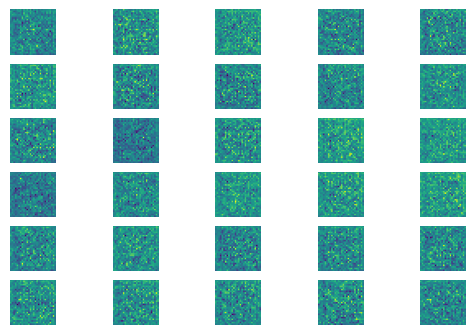

In [31]:
model = build_generator(latent_dim)

n_samples=30

x, _ = generate_fake_samples(model, latent_dim, n_samples)

x = (x + 1) / 2.0

for i in range(n_samples):

    plt.subplot(7,5, 1+i)
    plt.axis('off')
    plt.imshow(x[i])
    
plt.show()

In [32]:
def Build_Gan(generator_model, discriminator_model):

    discriminator_model.trainable = False

    model = Sequential()
    model.add(generator_model)
    model.add(discriminator_model)

    opt = Adam(learning_rate=0.001, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model

In [33]:
discriminator_model = build_discriminator()

generator_model = build_generator(latent_dim)

gan_model = Build_Gan(generator_model, discriminator_model)

gan_model.summary()

plot_model(gan_model, show_shapes=True, show_layer_names=True)

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_13 (Sequential)      │ (None, 28, 28, 1)      │     1,426,561 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_12 (Sequential)      │ (None, 1)              │       521,345 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,947,906 (7.43 MB)

 Trainable params: 1,426,561 (5.44 MB)

 Non-trainable params: 521,345 (1.99 MB)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [34]:
def train_gan(gan_model, latent_dim, n_epochs=200, n_batches=128):

    for i in range(n_epochs):

        x_gan = generate_latent_point(latent_dim, n_batches)

        y_gan = np.ones((n_batches, 1))

        gan_model.train_on_batch(x_gan, y_gan)

In [21]:
# def train(generator_model, discriminator_model, gan_model, dataset, latent_dim, n_epochs=200, n_batches=128):
#     bat_per_epoch = int(dataset.shape[0] / n_batches)
#     half_batch = int(n_batches/2)

#     for i in range(n_epochs):

#         for j in range(bat_per_epoch):

#             x_real, y_real = generate_real_samples(dataset, half_batch)

#             discriminator_loss_real, _ = discriminator_model.train_on_batch(x_real, y_real)

#             x_fake, y_fake = generate_fake_samples(generator_model, latent_dim, n_samples)

#             discriminator_loss_fake, _ = discriminator_model.train_on_batch(x_fake, y_fake)

#             x_gan = generate_latent_point(latent_dim, n_samples)
#             y_gan = np.ones((n_batches, 1))

#             generator_loss = gan_model.train_on_batch(x_gan, y_gan)

#             print('>%d, %d%d, d1=%.3f, d2%.3f g=%.3f' % (i+1, j+1, bat_per_epoch, discriminator_loss_real, discriminator_loss_fake, generator_loss))

In [22]:
# def summarize_performance(epoch, generator_model, discriminator_model, dataset , latent_dim, n_samples=150):

#     x_real, y_real = generate_real_samples(dataset, n_samples)

#     _, acc_real = discriminator_model.evaluate(x_real, y_real, verbose=0)

#     x_fake, y_fake = generate_fake_samples(generator_model, latent_dim, n_samples)

#     _, acc_fake = discriminator_model.evaluate(x_fake, y_fake, verbose=0)

#     print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))


In [35]:
def save_plot(examples, epoch, n=7):

    examples = (examples + 1)/2.0

    for i in range(n*n):
        plt.subplot(n, n, 1+i)
        plt.axis('off')
        plt.imshow(examples[i])
    
    filename='generated_plot_e%3d.png'% (epoch+1)
    plt.savefig(filename)
    plt.close()


In [36]:
def summarize_performance(epoch, generator_model, discriminator_model, dataset , latent_dim, n_samples=150):

    x_real, y_real = generate_real_samples(dataset, n_samples)

    _, acc_real = discriminator_model.evaluate(x_real, y_real, verbose=0)

    x_fake, y_fake = generate_fake_samples(generator_model, latent_dim, n_samples)

    _, acc_fake = discriminator_model.evaluate(x_fake, y_fake, verbose=0)

    print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))

    save_plot(x_fake, epoch)

    filename = 'generator_model_%3d.h5' % (epoch + 1)
    generator_model.save(filename)

In [37]:
def train(generator_model, discriminator_model, gan_model, dataset, latent_dim, n_epochs=200, n_batches=128):
    bat_per_epoch = int(dataset.shape[0] / n_batches)
    half_batch = int(n_batches/2)

    for i in range(n_epochs):

        for j in range(bat_per_epoch):

            x_real, y_real = generate_real_samples(dataset, half_batch)

            discriminator_loss_real, _ = discriminator_model.train_on_batch(x_real, y_real)

            x_fake, y_fake = generate_fake_samples(generator_model, latent_dim, half_batch)

            discriminator_loss_fake, _ = discriminator_model.train_on_batch(x_fake, y_fake)

            x_gan = generate_latent_point(latent_dim, n_batches)
            y_gan = np.ones((n_batches, 1))

            gan_loss = gan_model.train_on_batch(x_gan, y_gan)

            print('>%d, %d%d, d1=%.3f, d2%.3f g=%.3f' % (i+1, j+1, bat_per_epoch, discriminator_loss_real, discriminator_loss_fake, gan_loss))

        if (i+1) % 10 == 0:
            summarize_performance(i, generator_model, discriminator_model, dataset, latent_dim)

In [38]:

latent_dim = 100
discriminator_model = build_discriminator()

generator_model = build_generator(latent_dim)

gan_model = Build_Gan(generator_model, discriminator_model)

dataset = load_real_samples()


train(generator_model, discriminator_model, gan_model, dataset, latent_dim)



AttributeError: 'NoneType' object has no attribute 'update_state'